In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [3]:
X = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\Iris.csv')

In [42]:
X.drop(['Id','Species'], axis=1, inplace=True)


KeyError: "['Id', 'Species'] not found in axis"

In [69]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

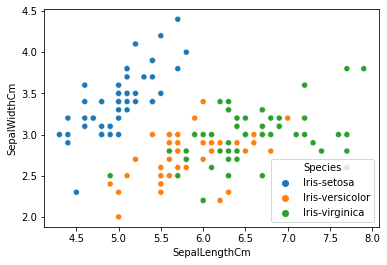

In [17]:
sns.scatterplot(data=X,x= 'SepalLengthCm',y= 'SepalWidthCm', hue = 'Species')

In [44]:
# init centers
centers = X.sample(3)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
95,5.7,3.0,4.2,1.2
139,6.9,3.1,5.4,2.1
62,6.0,2.2,4.0,1.0


In [54]:
centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
95,5.7,3.0,4.2,1.2
139,6.9,3.1,5.4,2.1
62,6.0,2.2,4.0,1.0


In [75]:
# X.iloc[:, :]
# # centers.iloc[0,:]
shit = (((X.iloc[:, :] - centers.iloc[0,:])**2).sum(axis=1))**0.5
shit

0      3.074085
1      3.078961
2      3.232646
3      3.083829
4      3.112876
         ...   
145    1.791647
146    1.319091
147    1.509967
148    1.749286
149    1.100000
Length: 150, dtype: float64

In [88]:
distances = np.zeros((len(X.index),3))

for i in range(3):
    distances[:,i] = (((X.iloc[:, :] - centers.iloc[i,:])**2).sum(axis=1))**0.5
distances

array([[3.07408523, 4.79687398, 3.14642654],
       [3.07896086, 4.86004115, 3.04138127],
       [3.23264598, 5.02692749, 3.25883415],
       [3.08382879, 4.91019348, 3.10805405],
       [3.11287648, 4.84458461, 3.21869539],
       [2.79105715, 4.41248229, 2.98328678],
       [3.16543836, 4.96185449, 3.26343377],
       [2.98998328, 4.74552421, 3.05450487],
       [3.24653662, 5.08920426, 3.23264598],
       [3.02489669, 4.81767579, 3.01330383],
       [2.97825452, 4.6292548 , 3.082207  ],
       [2.95465734, 4.74868403, 3.04630924],
       [3.14006369, 4.94165964, 3.10644491],
       [3.57491259, 5.40925133, 3.57071421],
       [3.318132  , 4.82389884, 3.42928564],
       [3.14483704, 4.60760241, 3.39705755],
       [3.15436206, 4.75289386, 3.3015148 ],
       [3.04302481, 4.7581509 , 3.122499  ],
       [2.77488739, 4.34281015, 2.90344623],
       [3.01662063, 4.70956474, 3.17962262],
       [2.73861279, 4.43170396, 2.78028775],
       [2.96310648, 4.65832588, 3.10966236],
       [3.

In [89]:
closest = np.argmin(distances, axis = 1)

In [90]:
closest

array([0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [98]:
X[closest == 2]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,4.9,3.0,1.4,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
25,5.0,3.0,1.6,0.2
34,4.9,3.1,1.5,0.1
35,5.0,3.2,1.2,0.2
37,4.9,3.1,1.5,0.1
41,4.5,2.3,1.3,0.3


In [99]:
centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
95,5.7,3.0,4.2,1.2
139,6.9,3.1,5.4,2.1
62,6.0,2.2,4.0,1.0


array([2, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0],
      dtype=int64)

In [17]:
X[closest == 0].mean(axis=0)

array([0.55084464, 0.15675788])

In [100]:
X[closest == i].mean(axis=0)

SepalLengthCm    5.497468
SepalWidthCm     3.194937
PetalLengthCm    2.988608
PetalWidthCm     0.870886
dtype: float64

In [25]:
np.random.seed(4160659)
# X[closest == 0].mean(axis=0)
centers = X[np.random.choice(n,k,replace=False)]
closest =np.zeros(n).astype(int)


while True:
    old_closest = closest.copy()
#     for iteration in range(10):
    print(closest)
    distances = cdist(X,centers)
    closest = np.argmin(distances,axis=1)

    for i in range(k):
        centers[i,:] = X[closest == i].mean(axis=0)

    if all(closest == old_closest):
        break

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 0 2 1 1 1 0 1 1 2 1 2 1 2 2 1 0 2 2 1]
[2 0 2 1 1 1 0 1 1 2 0 2 1 2 2 0 0 2 2 1]
[2 0 2 1 1 1 0 1 1 2 0 2 1 2 1 0 0 2 2 1]
[2 0 2 1 1 1 0 1 1 2 0 1 1 2 1 0 0 2 2 1]
[2 0 2 1 1 1 0 1 0 2 0 1 1 2 1 0 0 2 2 1]
[2 0 2 1 1 0 1 0 0 2 0 1 1 2 1 0 0 2 2 1]
[2 0 2 1 1 0 1 0 0 2 0 1 0 2 1 0 0 2 2 1]


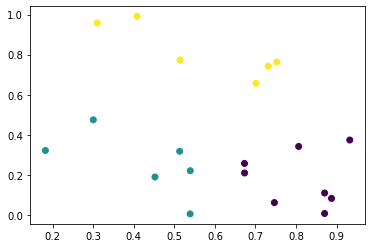

In [27]:
plt.scatter(X[:,0],X[:,1],c=closest)

In [28]:
def kmenas(X,k):

    x = X.shape[0]
    centers = X[np.random.choice(n,k,replace=False)]
    closest =np.zeros(n).astype(int)


    while True:
        old_closest = closest.copy()
    #     for iteration in range(10):
        print(closest)
        distances = cdist(X,centers)
        closest = np.argmin(distances,axis=1)

        for i in range(k):
            centers[i,:] = X[closest == i].mean(axis=0)

        if all(closest == old_closest):
            break
            
    return closest, centers

In [30]:
labels, centers = kmenas(X,3)
print(labels)
print(centers)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 2 2 1 2 1 1 0 1 2 2 0 2 1 1 0 0 2]
[0 1 0 2 2 1 2 1 1 0 1 2 1 0 2 1 1 0 0 2]
[0 1 0 2 2 1 2 1 1 0 1 2 1 0 2 1 1 0 0 2]
[[0.56944108 0.8141337 ]
 [0.80751961 0.18099668]
 [0.42090709 0.25537674]]
